#                    HOTEL RECOMMENDATION SYSTEM 

# 1) Data Science Proposal for achieving the objective mentioned

## The data science proposal is to construct the means for extracting business-focused insights from data. This requires an understanding of how value and information flows in a business, and the ability to use that understanding to identify business opportunities for hotel recommendation. 

## 2.1) Importing CSV file

In [144]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import warnings 
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics
from sklearn.metrics import accuracy_score, log_loss
import scipy as sci
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
import random
from sklearn import preprocessing
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import re, nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import warnings
stop_words = set(stopwords.words('english'))
wordnet_lemmatizer = WordNetLemmatizer()
warnings.filterwarnings("ignore")

In [145]:
df_hotel = pd.read_csv("Hotel_Review.csv")
df_hotel

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,42950,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,42950,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,42947,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,42947,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,42940,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694,1 2 Serjeant s Inn Fleet Street City of London...,639,42493,9.2,Apex Temple Court Hotel,Netherlands,No Negative,0,2619,Location rooms and staff,5,3,9.6,"[' Leisure trip ', ' Couple ', ' City King Roo...",457 day,51.513734,-0.108751
1695,1 2 Serjeant s Inn Fleet Street City of London...,639,42493,9.2,Apex Temple Court Hotel,United Kingdom,Nothing,2,2619,Excellent location for seeing a show,7,2,9.2,"[' Leisure trip ', ' Couple ', ' City King Roo...",457 day,51.513734,-0.108751
1696,1 2 Serjeant s Inn Fleet Street City of London...,639,42492,9.2,Apex Temple Court Hotel,United States of America,No Negative,0,2619,Location easy to get downtown and to local pu...,20,1,10.0,"[' Leisure trip ', ' Couple ', ' City King Roo...",458 day,51.513734,-0.108751
1697,1 2 Serjeant s Inn Fleet Street City of London...,639,42491,9.2,Apex Temple Court Hotel,United Kingdom,My room overlooked the office next door so my...,21,2619,The bar staff were very good,8,2,9.6,"[' Leisure trip ', ' Couple ', ' City King Roo...",459 day,51.513734,-0.108751


## 2.2) Exploratory Data Analysis

In [146]:
df_hotel.describe(include='all')

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
count,1699,1699.000000,1699.000000,1699.000000,1699,1699,1699,1699.000000,1699.000000,1699,1699.000000,1699.000000,1699.000000,1699,1699,1699.000000,1699.000000
unique,3,NaN,NaN,NaN,3,75,1160,NaN,NaN,1594,NaN,NaN,NaN,542,608,NaN,NaN
top,1 2 Serjeant s Inn Fleet Street City of London...,NaN,NaN,NaN,Apex Temple Court Hotel,United Kingdom,No Negative,NaN,NaN,No Positive,NaN,NaN,NaN,"[' Leisure trip ', ' Couple ', ' City King Roo...",457 day,NaN,NaN
freq,728,NaN,NaN,NaN,728,935,446,NaN,NaN,84,NaN,NaN,NaN,83,13,NaN,NaN
mean,NaN,401.333726,42574.655091,8.609241,NaN,NaN,NaN,20.088287,2066.623308,NaN,22.469688,7.100647,8.695350,NaN,NaN,51.708322,1.060296
std,NaN,206.692818,191.978935,0.592277,NaN,NaN,NaN,32.630482,504.345712,NaN,23.187630,10.531399,1.493274,NaN,NaN,0.365132,2.158009
min,NaN,194.000000,42220.000000,7.700000,NaN,NaN,NaN,0.000000,1403.000000,NaN,0.000000,1.000000,2.500000,NaN,NaN,51.491888,-0.194971
25%,NaN,244.000000,42420.500000,8.500000,NaN,NaN,NaN,0.000000,1831.000000,NaN,8.000000,1.000000,7.900000,NaN,NaN,51.491888,-0.194971
50%,NaN,244.000000,42563.000000,8.500000,NaN,NaN,NaN,10.000000,1831.000000,NaN,15.000000,3.000000,9.200000,NaN,NaN,51.513734,-0.108751
75%,NaN,639.000000,42730.000000,9.200000,NaN,NaN,NaN,26.000000,2619.000000,NaN,30.000000,8.000000,10.000000,NaN,NaN,51.513734,-0.108751


In [147]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Hotel_Address                               1699 non-null   object 
 1   Additional_Number_of_Scoring                1699 non-null   int64  
 2   Review_Date                                 1699 non-null   int64  
 3   Average_Score                               1699 non-null   float64
 4   Hotel_Name                                  1699 non-null   object 
 5   Reviewer_Nationality                        1699 non-null   object 
 6   Negative_Review                             1699 non-null   object 
 7   Review_Total_Negative_Word_Counts           1699 non-null   int64  
 8   Total_Number_of_Reviews                     1699 non-null   int64  
 9   Positive_Review                             1699 non-null   object 
 10  Review_Total

In [148]:
pd.pivot_table(df_hotel, index =['Hotel_Name'])

,Additional_Number_of_Scoring,Average_Score,Review_Date,Review_Total_Negative_Word_Counts,Review_Total_Positive_Word_Counts,Reviewer_Score,Total_Number_of_Reviews,Total_Number_of_Reviews_Reviewer_Has_Given,lat,lng
Hotel_Name,,,,,,,,,,
Apex Temple Court Hotel,639,9.2,42607.668956,15.438187,23.256868,9.245192,2619,6.986264,51.513734,-0.108751
Hotel Arena,194,7.7,42556.167901,30.800000,23.639506,7.836296,1403,5.977778,52.360576,4.915968
K K Hotel George,244,8.5,42545.420495,18.404594,20.620141,8.602827,1831,8.051237,51.491888,-0.194971


In [149]:
grouped_df = df_hotel.groupby('Hotel_Name').apply(lambda a: a.drop('Hotel_Name', axis=1)[:])
grouped_df.loc[['Apex Temple Court Hotel']]

Hotel_Address  \
Hotel_Name                                                                        
Apex Temple Court Hotel 971   1 2 Serjeant s Inn Fleet Street City of London...   
                        972   1 2 Serjeant s Inn Fleet Street City of London...   
                        973   1 2 Serjeant s Inn Fleet Street City of London...   
                        974   1 2 Serjeant s Inn Fleet Street City of London...   
                        975   1 2 Serjeant s Inn Fleet Street City of London...   
...                                                                         ...   
                        1694  1 2 Serjeant s Inn Fleet Street City of London...   
                        1695  1 2 Serjeant s Inn Fleet Street City of London...   
                        1696  1 2 Serjeant s Inn Fleet Street City of London...   
                        1697  1 2 Serjeant s Inn Fleet Street City of London...   
                        1698  1 2 Serjeant s Inn Fleet Street City of London...   

                              Additional_Number_of_Scoring  Review_Date  \
Hotel_Name                                                                
Apex Temple Court Hotel 971                            639        42949   
                        972                            639        42949   
                        973                            639        42949   
                        974                            639        42926   
                        975                            639        42926   
...                                                    ...          ...   
                        1694                           639        42493   
                        1695                           639        42493   
                        1696                           639        42492   
                        1697                           639        42491   
                        1698                           639        42490   

                              Average_Score        Reviewer_Nationality  \
Hotel_Name                                                                
Apex Temple Court Hotel 971             9.2             United Kingdom    
                        972             9.2                    Ireland    
                        973             9.2             United Kingdom    
                        974             9.2             United Kingdom    
                        975             9.2             United Kingdom    
...                                     ...                         ...   
                        1694            9.2                Netherlands    
                        1695            9.2             United Kingdom    
                        1696            9.2   United States of America    
                        1697            9.2             United Kingdom    
                        1698            9.2             United Kingdom    

                                                                Negative_Review  \
Hotel_Name                                                                        
Apex Temple Court Hotel 971    Difficult to locate the phone to contact rece...   
                        972                                  Air con not great    
                        973    Not a fan of the breakfast to be honest the e...   
                        974    No parking on site We parked about 1 2 mile a...   
                        975                                         No Negative   
...                                                                         ...   
                        1694                                        No Negative   
                        1695                                            Nothing   
                        1696                                        No Negative   
                        1697   My room overlooked the office next door so my...   
                        1698          

In [150]:
grouped_df.loc[['Hotel Arena']]

Hotel_Address  \
Hotel_Name                                                           
Hotel Arena 0     s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
            1     s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
            2     s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
            3     s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
            4     s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
...                                                            ...   
            400   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
            401   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
            402   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
            403   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
            404   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

                 Additional_Number_of_Scoring  Review_Date  Average_Score  \
Hotel_Name                                                                  
Hotel Arena 0                             194        42950            7.7   
            1                             194        42950            7.7   
            2                             194        42947            7.7   
            3                             194        42947            7.7   
            4                             194        42940            7.7   
...                                       ...          ...            ...   
            400                           194        42233            7.7   
            401                           194        42232            7.7   
            402                           194        42225            7.7   
            403                           194        42220            7.7   
            404                           194        42220            7.7   

                Reviewer_Nationality  \
Hotel_Name                             
Hotel Arena 0                Russia    
            1               Ireland    
            2             Australia    
            3        United Kingdom    
            4           New Zealand    
...                              ...   
            400      United Kingdom    
            401              Norway    
            402      United Kingdom    
            403      United Kingdom    
            404      United Kingdom    

                                                   Negative_Review  \
Hotel_Name                                                           
Hotel Arena 0     I am so angry that i made this post available...   
            1                                          No Negative   
            2     Rooms are nice but for elderly a bit difficul...   
            3     My room was dirty and I was afraid to walk ba...   
            4     You When I booked with your company on line y...   
...                                                            ...   
            400   Expensive to get to from the train station ai...   
            401                              Doors to the bathroom   
            402                                        No Negative   
            403                                        No Negative   
            404                                        No Negative   

                 Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
Hotel_Name                                                                    
Hotel Arena 0                                  397                     1403   
            1                                    0                     1403   
            2                                   42                     1403   
            3                                  210                     1403   
            4                                  140                     1403   
...                                            ...                      ...   
            400                                 10                     1403 

In [151]:
grouped_df.loc[['K K Hotel George']]

Hotel_Address  \
Hotel_Name                                                                
K K Hotel George 405  1 15 Templeton Place Earl s Court Kensington a...   
                 406  1 15 Templeton Place Earl s Court Kensington a...   
                 407  1 15 Templeton Place Earl s Court Kensington a...   
                 408  1 15 Templeton Place Earl s Court Kensington a...   
                 409  1 15 Templeton Place Earl s Court Kensington a...   
...                                                                 ...   
                 966  1 15 Templeton Place Earl s Court Kensington a...   
                 967  1 15 Templeton Place Earl s Court Kensington a...   
                 968  1 15 Templeton Place Earl s Court Kensington a...   
                 969  1 15 Templeton Place Earl s Court Kensington a...   
                 970  1 15 Templeton Place Earl s Court Kensington a...   

                      Additional_Number_of_Scoring  Review_Date  \
Hotel_Name                                                        
K K Hotel George 405                           244        42950   
                 406                           244        42949   
                 407                           244        42936   
                 408                           244        42935   
                 409                           244        42934   
...                                            ...          ...   
                 966                           244        42251   
                 967                           244        42248   
                 968                           244        42241   
                 969                           244        42232   
                 970                           244        42225   

                      Average_Score        Reviewer_Nationality  \
Hotel_Name                                                        
K K Hotel George 405            8.5                    Ireland    
                 406            8.5   United States of America    
                 407            8.5   United States of America    
                 408            8.5                  Australia    
                 409            8.5   United States of America    
...                             ...                         ...   
                 966            8.5   United States of America    
                 967            8.5             United Kingdom    
                 968            8.5                    Belgium    
                 969            8.5                  Hong Kong    
                 970            8.5             United Kingdom    

                                                        Negative_Review  \
Hotel_Name                                                                
K K Hotel George 405    Really nothing negative to say about this hotel   
                 406   No coffee or tea in the room or lobby No one ...   
                 407         Room was pretty small for the three of us    
                 408                                    Nothing really    
                 409   Only cab service to airport is expensive comp...   
...                                                                 ...   
                 966                                        No Negative   
                 967                                     Small Bathroom   
                 968                                        No Negative   
                 969                             The room is a bit old    
                 970                                        No Negative   

                      Review_Total_Negative_Word_Counts  \
Hotel_Name                                                
K K Hotel George 405                                  9   
                 406                                 52   
                 407                                 11   
                 408                                  4   
        

In [152]:
df_hotel.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

In [153]:
print("Rows: " + str(df_hotel.shape[0]))
print("Columns: " + str(df_hotel.shape[1]))

Rows: 1699
Columns: 17


Different nationalities:  75


,Reviewer_Nationality
United Kingdom,935
United States of America,130
Ireland,74
Australia,67
Switzerland,39
...,...
Gibraltar,1
Bulgaria,1
Ukraine,1
Lithuania,1


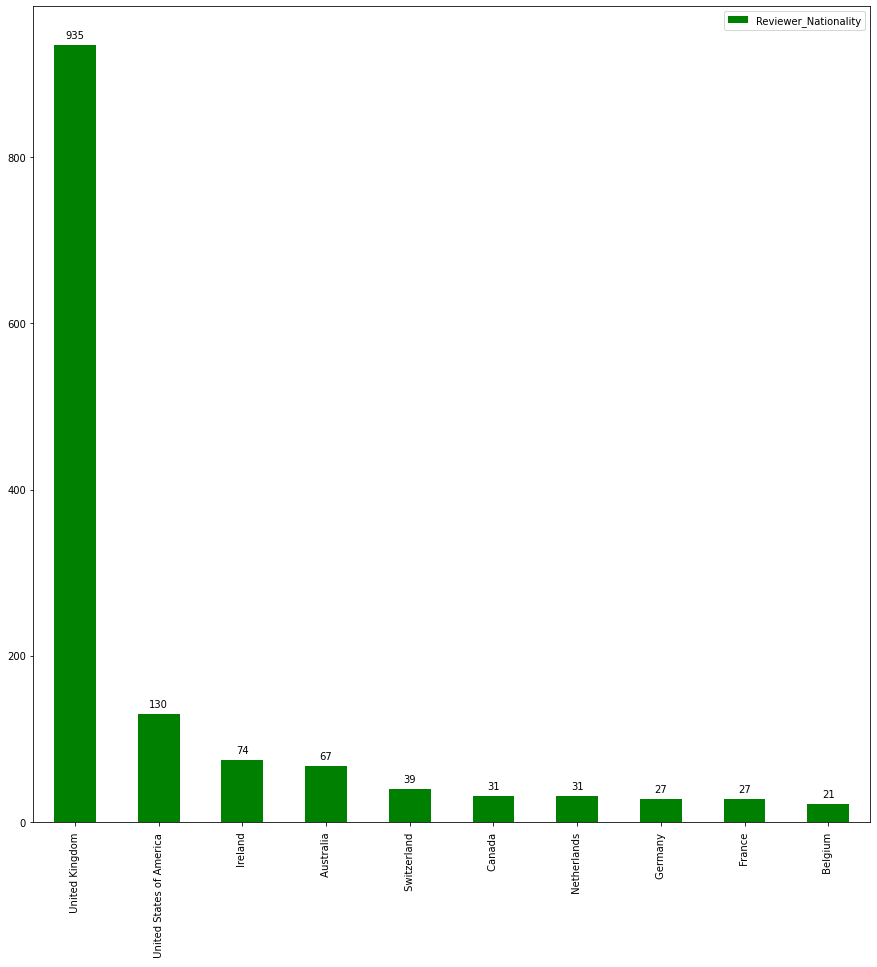

In [154]:
# Distinct values in Reviewer_Nationality
distinct_nationality = df_hotel["Reviewer_Nationality"].value_counts()
print("Different nationalities: ", distinct_nationality.size)

# Country and number of reviews in each country
distinct_nationality = distinct_nationality.to_frame().sort_values(by='Reviewer_Nationality', ascending=False)
ax = distinct_nationality.head(10).plot(kind='bar',figsize=(15,15), color='green')
for p in ax.patches:   
        ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
        
distinct_nationality 

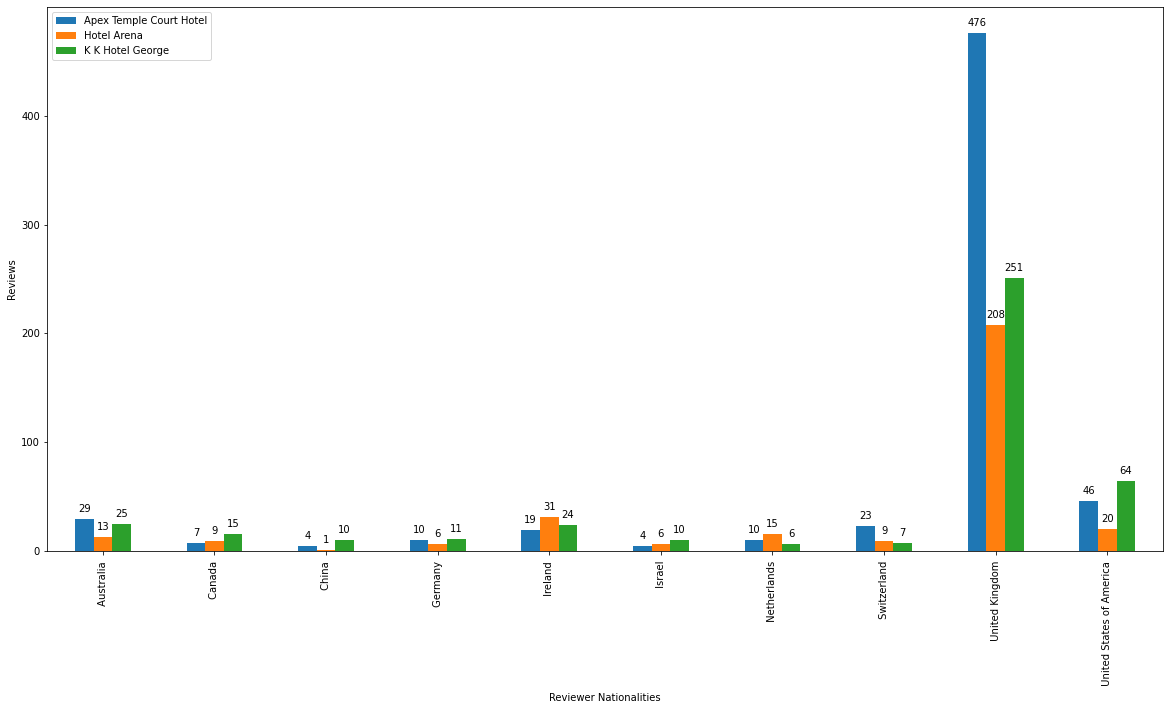

In [155]:
# Total reviews for each hotel in each of the top 10 nationalities
grouped_df1 = df_hotel.groupby(['Reviewer_Nationality'])['Hotel_Name'].value_counts().rename('Reviews').reset_index().sort_values(by='Reviews', ascending=False)
grouped_df1 = grouped_df1[grouped_df1.groupby('Reviewer_Nationality', sort=False).ngroup() < 10]
ax = grouped_df1.pivot("Reviewer_Nationality", "Hotel_Name", "Reviews").plot(kind='bar', xlabel='Reviewer Nationalities', ylabel='Reviews', figsize=(20,10))
plt.legend(loc='upper left')
for p in ax.patches:   
        ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points') 

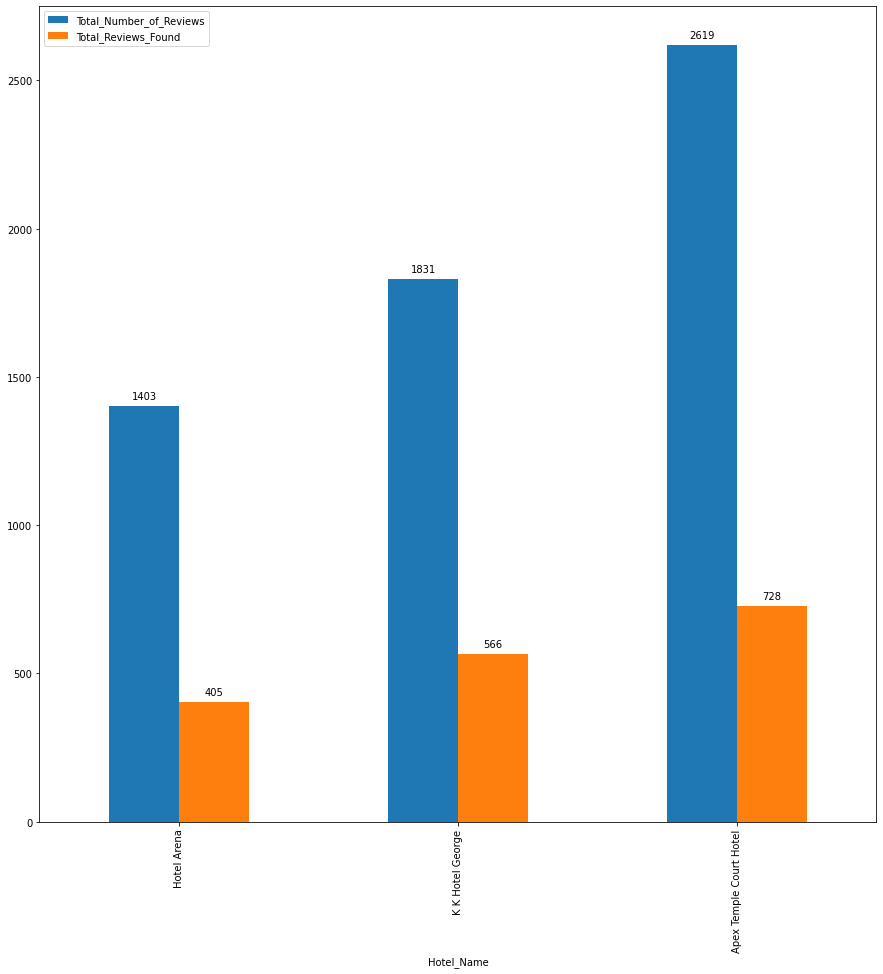

In [156]:
# How many reviews are there per hotel 
hotel_freq_df = df_hotel[['Hotel_Name', 'Total_Number_of_Reviews']]
hotel_freq_df['Total_Reviews_Found'] = hotel_freq_df.groupby('Hotel_Name').transform('count')
hotel_freq_df = hotel_freq_df.drop_duplicates(subset = ["Hotel_Name"]).set_index('Hotel_Name')
ax = hotel_freq_df.plot(kind='bar',figsize=(15,15))
for p in ax.patches:   
        ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
        
        
        
# Inference
# Counted reviews in the dataset results do not match the value in Total_Number_of_Reviews. 
# It is unclear if this value in the dataset represented the total number of reviews the hotel had or some other calculation.
# Total_Number_of_Reviews is not used in the model because of this unclarity.

# Apex Temple Court Hotel is the hotel with highest review
# Hotel Arena is the hotel with lowest review

In [157]:
# Each hotel has Average_Score in dataset
# Calculate average of Reviewer_Score for each hotel
# Take difference and compare them
def get_avg_score_diff(row):
    return row["Average_Score"] - row["Calculated_Average_Score"]

df_hotel['Calculated_Average_Score'] = round(df_hotel.groupby('Hotel_Name').Reviewer_Score.transform('mean'), 1)
df_hotel["Average_Score_Difference"] = df_hotel.apply(get_avg_score_diff, axis = 1)
review_scores_df = df_hotel.drop_duplicates(subset = ["Hotel_Name"]).sort_values(by=["Average_Score_Difference"])
review_scores_df[["Hotel_Name", "Average_Score", "Calculated_Average_Score", "Average_Score_Difference"]]


# Inference
# Average_Score value is different from the Calculated_Average_Score.
# As we can't know why some of the values match, but others have a difference, it's safest in this case to use the review scores that we have to calculate the average ourselves.
# That said, the differences are usually very small

,Hotel_Name,Average_Score,Calculated_Average_Score,Average_Score_Difference
0,Hotel Arena,7.7,7.8,-0.1
405,K K Hotel George,8.5,8.6,-0.1
971,Apex Temple Court Hotel,9.2,9.2,0.0


In [158]:
no_negative_reviews = df_hotel.apply(lambda x: True if x['Negative_Review'] == "No Negative" else False , axis=1)
print("Number of No Negative reviews: " + str(len(no_negative_reviews[no_negative_reviews == True].index)))

no_positive_reviews = df_hotel.apply(lambda x: True if x['Positive_Review'] == "No Positive" else False , axis=1)
print("Number of No Positive reviews: " + str(len(no_positive_reviews[no_positive_reviews == True].index)))

both_no_reviews = df_hotel.apply(lambda x: True if x['Negative_Review'] == "No Negative" and x['Positive_Review'] == "No Positive" else False , axis=1)
print("Number of both No Negative and No Positive reviews: " + str(len(both_no_reviews[both_no_reviews == True].index)))

Number of No Negative reviews: 446
Number of No Positive reviews: 84
Number of both No Negative and No Positive reviews: 1


In [159]:
# Most satisfied people with respect to countries
df_hotel.groupby('Reviewer_Nationality')['Reviewer_Score'].mean().sort_values(ascending=False).head(7)

Reviewer_Nationality
 United States Minor Outlying Islands     10.000000
 Liechtenstein                            10.000000
 Morocco                                  10.000000
 Oman                                     10.000000
 Panama                                   10.000000
 Argentina                                 9.800000
 Slovakia                                  9.733333
Name: Reviewer_Score, dtype: float64

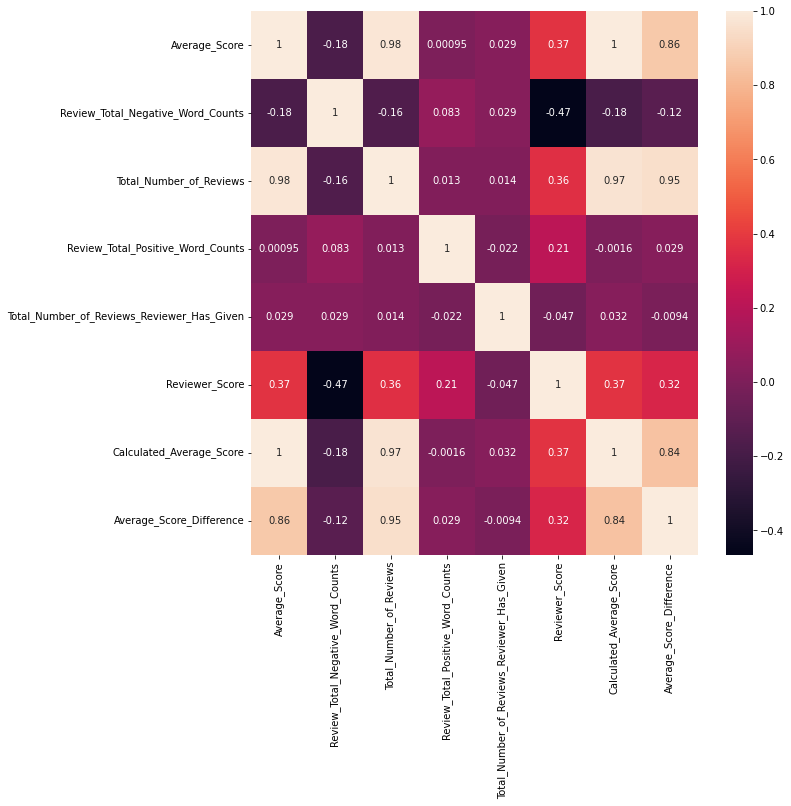

In [160]:
# Heatmap to see how all columns are correlated with each other
# Positive correlation - when one increases, other increases
# Negative correlation - when one increases, other decreases
plt.figure(figsize=(10,10))
sns.heatmap(df_hotel[['Average_Score', 'Review_Total_Negative_Word_Counts','Total_Number_of_Reviews', 'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Calculated_Average_Score', 'Average_Score_Difference']].corr(), annot=True)
plt.show()

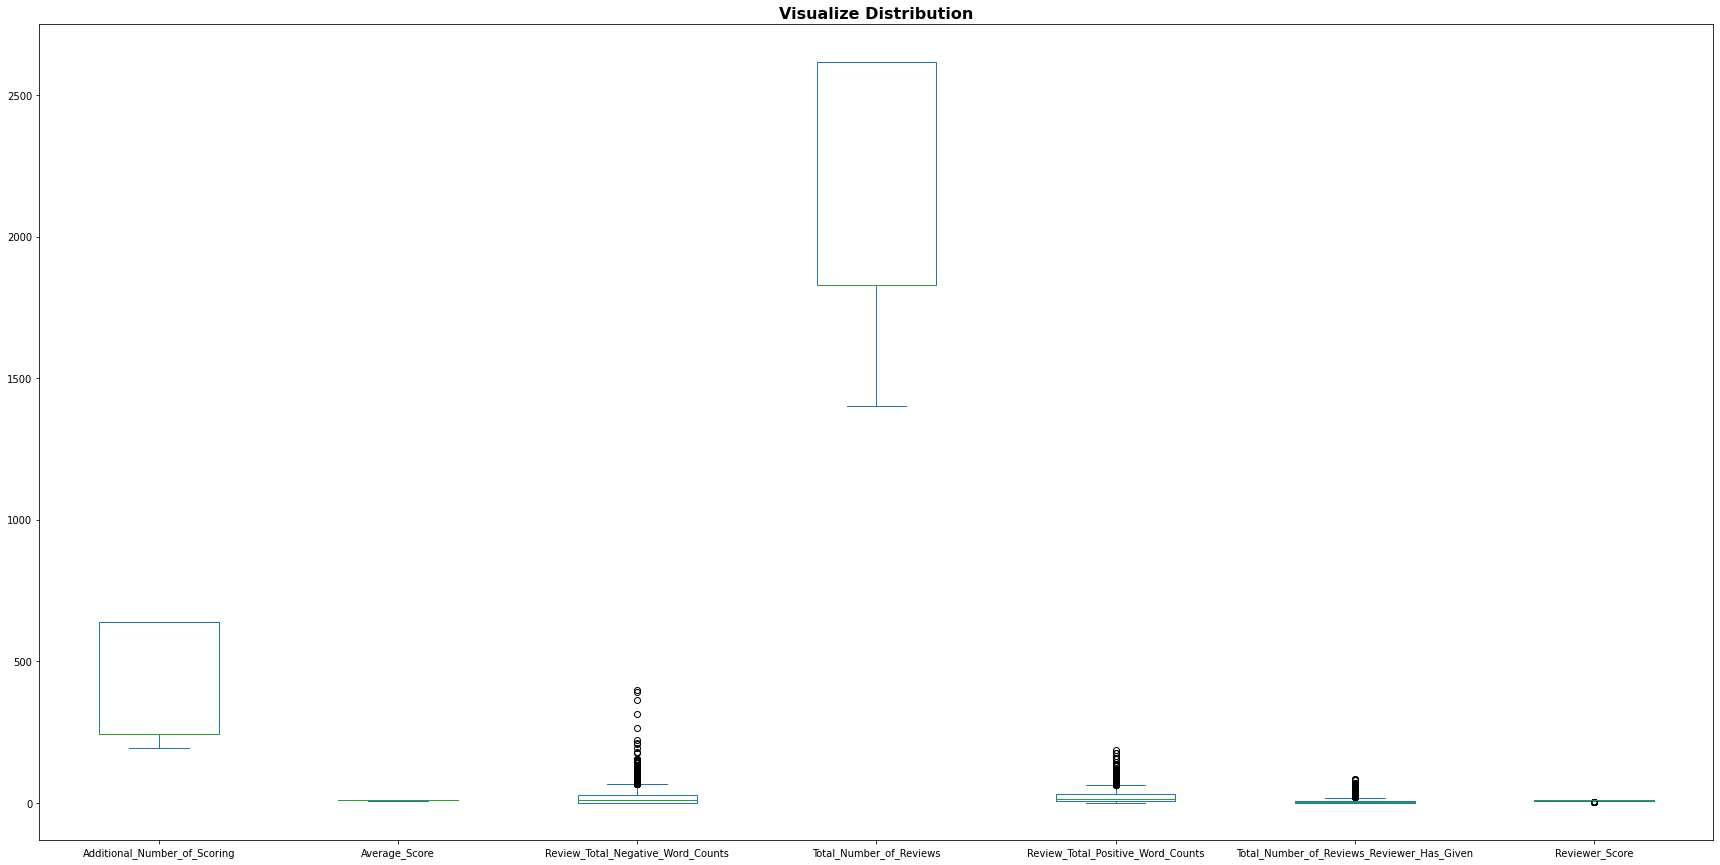

In [161]:
# Boxplot to visualize distribution - whether normalized or skewed
boxplot = df_hotel[['Additional_Number_of_Scoring', 'Average_Score', 'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score']].plot(kind='box', figsize=(30, 15))
boxplot.set_title('Visualize Distribution', fontdict={'fontsize':16, 'fontweight': 'bold'})

# Show plot
plt.show()

In [162]:
df_hotel['Instances'] = df_hotel['Reviewer_Nationality'].map(df_hotel['Reviewer_Nationality'].value_counts())
review_df = df_hotel.groupby(['Reviewer_Nationality', 'Hotel_Name'], as_index=False).agg(Total_Positive_Review = ('Positive_Review', 'count'), Total_Negative_Review = ('Negative_Review', 'count'), Instances = ('Instances', 'first')) 

review_df = review_df.sort_values(by='Instances', ascending=False)
review_df = review_df[review_df.groupby('Reviewer_Nationality', sort=False).ngroup() < 10]

review_df[review_df['Total_Positive_Review'] != review_df['Total_Negative_Review']]


,Reviewer_Nationality,Hotel_Name,Total_Positive_Review,Total_Negative_Review,Instances


### Number of hotels = 3 (1 in Netherlands, 2 in UK)
#### 3 major hotels available in UK and Netherlands

In [165]:
df_hotel.Hotel_Name.unique()

array(['Hotel Arena', 'K K Hotel George', 'Apex Temple Court Hotel'],
      dtype=object)

### Hotel Ratings

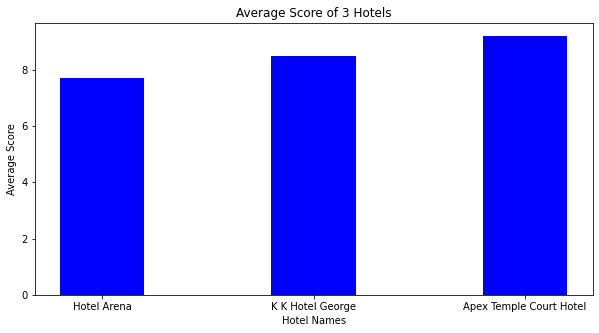

In [166]:
# Creating the dataset
data = {'Hotel Arena':7.7, 'K K Hotel George':8.5, 'Apex Temple Court Hotel':9.2}
hotel_name = list(data.keys())
scores = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# Creating the bar plot
plt.bar(hotel_name, scores, color ='blue',
        width = 0.4)
 
plt.xlabel("Hotel Names")
plt.ylabel("Average Score")
plt.title("Average Score of 3 Hotels")
plt.show()

<AxesSubplot:title={'center':'Hotel Number of Reviews'}, xlabel='Hotels', ylabel='Number of Reviews'>

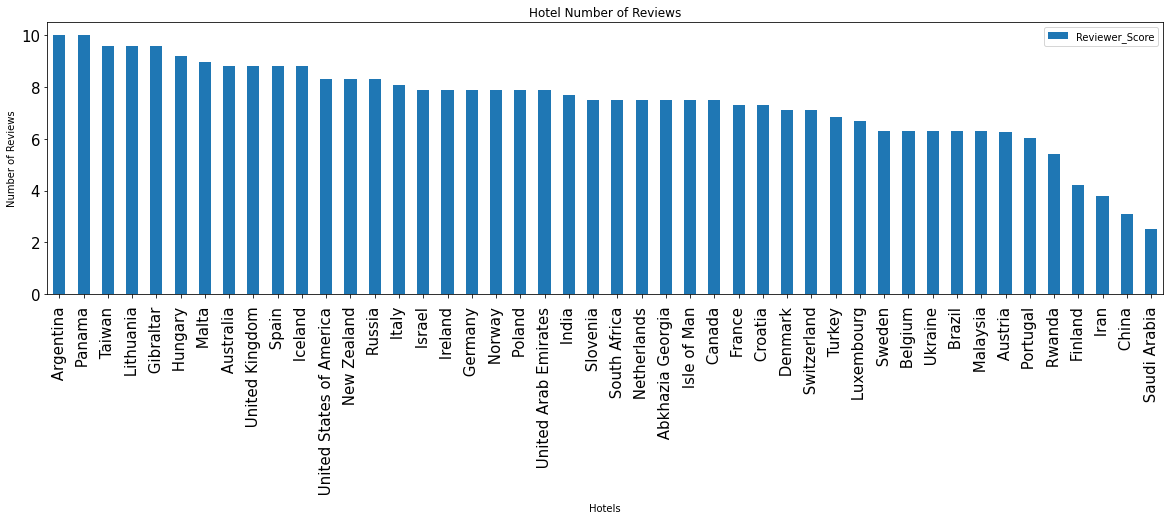

In [167]:
hotel_data_1 = df_hotel[['Hotel_Name','Reviewer_Nationality','Reviewer_Score']]

hotel_data_1 = hotel_data_1.loc[hotel_data_1['Hotel_Name'] == "Hotel Arena"].groupby(["Reviewer_Nationality"]).median('Reviewer_Score').sort_values('Reviewer_Score',ascending=False)

hotel_data_1.plot(kind="bar", fontsize=15, figsize=(20,5), title='Hotel Number of Reviews', xlabel='Hotels', ylabel='Number of Reviews')

<AxesSubplot:title={'center':'Hotel Number of Reviews'}, xlabel='Hotels', ylabel='Numbre of Reviews'>

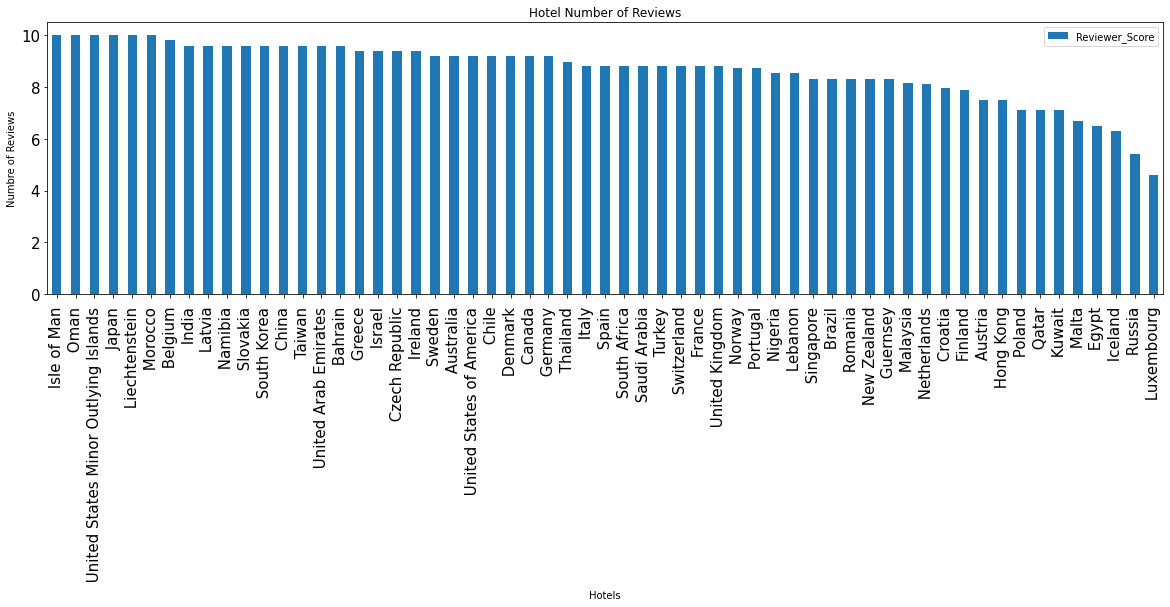

In [168]:
hotel_data_1 = df_hotel[['Hotel_Name','Reviewer_Nationality','Reviewer_Score']]

hotel_data_1 = hotel_data_1.loc[hotel_data_1['Hotel_Name'] == "K K Hotel George"].groupby(["Reviewer_Nationality"]).median('Reviewer_Score').sort_values('Reviewer_Score',ascending=False)

hotel_data_1.plot(kind="bar", fontsize=15, figsize=(20,5), title='Hotel Number of Reviews', xlabel='Hotels', ylabel='Numbre of Reviews')

<AxesSubplot:title={'center':'Hotel Number of Reviews'}, xlabel='Hotels', ylabel='Numbre of Reviews'>

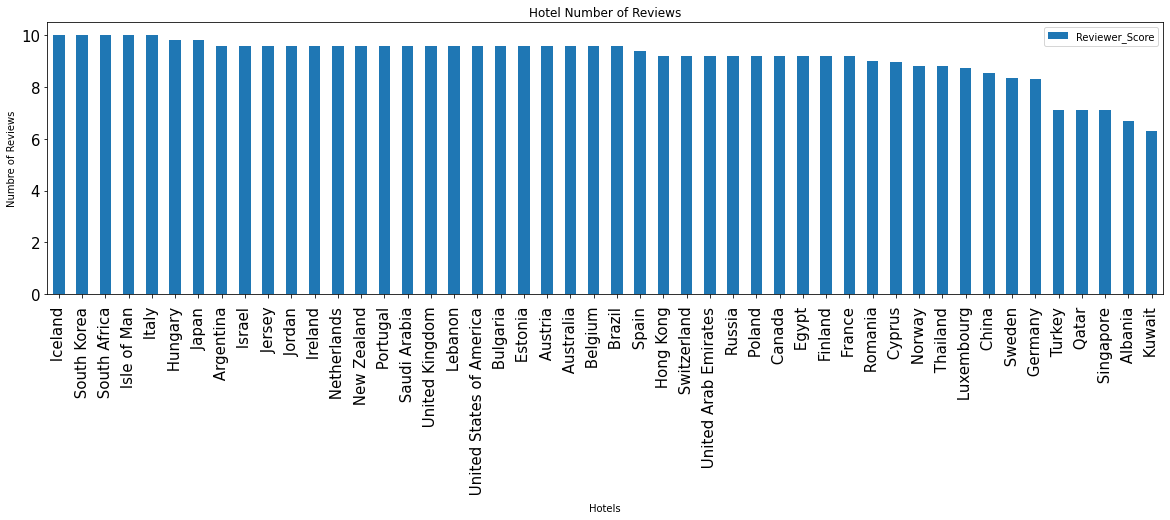

In [169]:
hotel_data_1 = df_hotel[['Hotel_Name','Reviewer_Nationality','Reviewer_Score']]

hotel_data_1 = hotel_data_1.loc[hotel_data_1['Hotel_Name'] =="Apex Temple Court Hotel"].groupby(["Reviewer_Nationality"]).median('Reviewer_Score').sort_values('Reviewer_Score',ascending=False)

hotel_data_1.plot(kind="bar", fontsize=15, figsize=(20,5), title='Hotel Number of Reviews', xlabel='Hotels', ylabel='Numbre of Reviews')

In [170]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(df_hotel[['Average_Score','Total_Number_of_Reviews','Reviewer_Score']])

scaled_df = pd.DataFrame(X_train_minmax)

In [171]:
scaled_df

,0,1,2
0,0.0,0.0,0.053333
1,0.0,0.0,0.666667
2,0.0,0.0,0.613333
3,0.0,0.0,0.173333
4,0.0,0.0,0.560000
...,...,...,...
1694,1.0,1.0,0.946667
1695,1.0,1.0,0.893333
1696,1.0,1.0,1.000000
1697,1.0,1.0,0.946667


# 3) Data Preprocessing & Preparation

## 3.1) Handle NULL & Missing Values

In [172]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Hotel_Address                               1699 non-null   object 
 1   Additional_Number_of_Scoring                1699 non-null   int64  
 2   Review_Date                                 1699 non-null   int64  
 3   Average_Score                               1699 non-null   float64
 4   Hotel_Name                                  1699 non-null   object 
 5   Reviewer_Nationality                        1699 non-null   object 
 6   Negative_Review                             1699 non-null   object 
 7   Review_Total_Negative_Word_Counts           1699 non-null   int64  
 8   Total_Number_of_Reviews                     1699 non-null   int64  
 9   Positive_Review                             1699 non-null   object 
 10  Review_Total

array([[<AxesSubplot:title={'center':'Additional_Number_of_Scoring'}>,
        <AxesSubplot:title={'center':'Review_Date'}>,
        <AxesSubplot:title={'center':'Average_Score'}>,
        <AxesSubplot:title={'center':'Review_Total_Negative_Word_Counts'}>],
       [<AxesSubplot:title={'center':'Total_Number_of_Reviews'}>,
        <AxesSubplot:title={'center':'Review_Total_Positive_Word_Counts'}>,
        <AxesSubplot:title={'center':'Total_Number_of_Reviews_Reviewer_Has_Given'}>,
        <AxesSubplot:title={'center':'Reviewer_Score'}>],
       [<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'lng'}>,
        <AxesSubplot:title={'center':'Calculated_Average_Score'}>,
        <AxesSubplot:title={'center':'Average_Score_Difference'}>],
       [<AxesSubplot:title={'center':'Instances'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

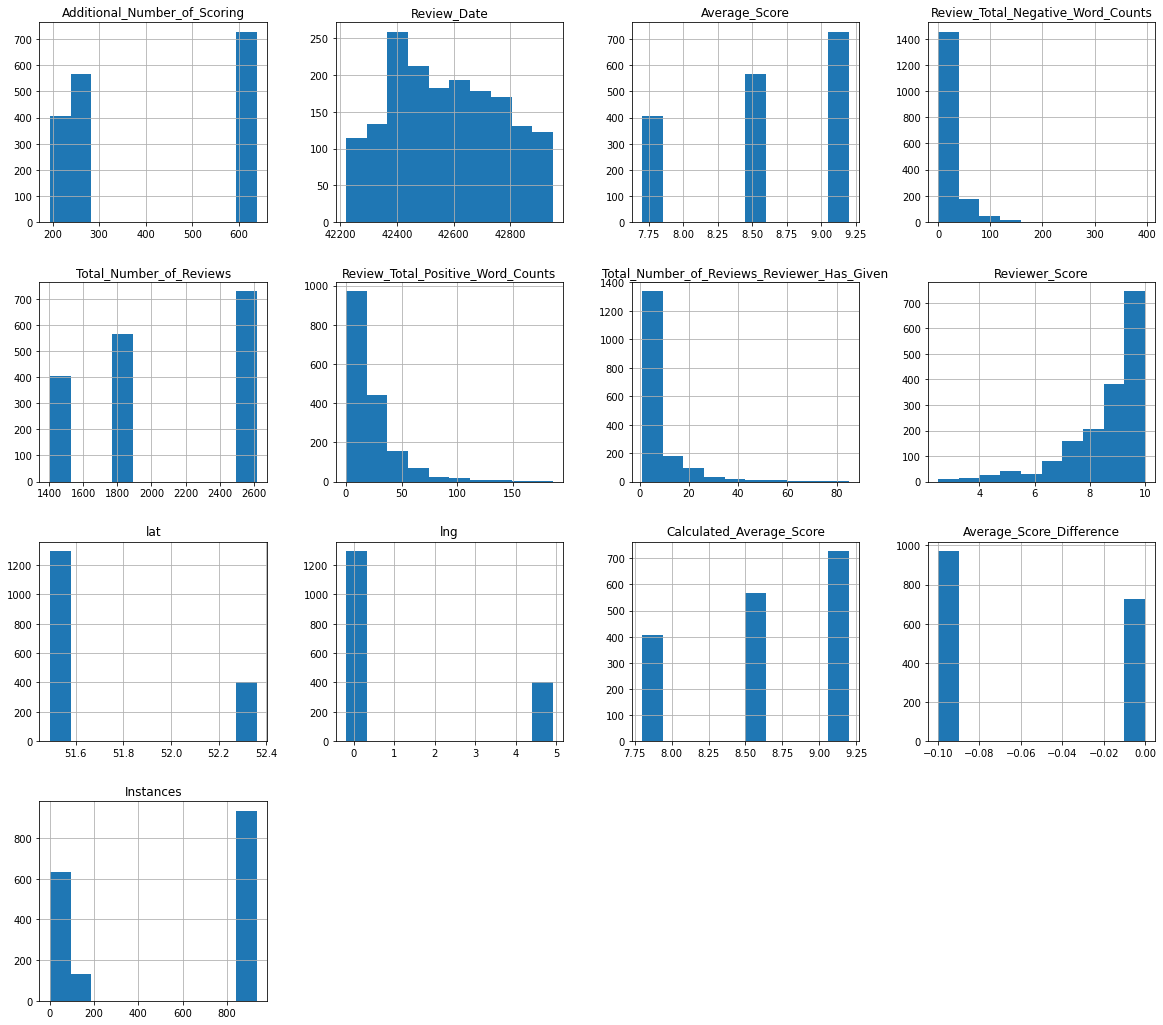

In [173]:
# See distribution for the dataset
df_hotel.hist(figsize = (20,18)) 

In [174]:
# Detect missing values/outliers in each column
df_hotel.isnull().sum()

Hotel_Address                                 0
Additional_Number_of_Scoring                  0
Review_Date                                   0
Average_Score                                 0
Hotel_Name                                    0
Reviewer_Nationality                          0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Tags                                          0
days_since_review                             0
lat                                           0
lng                                           0
Calculated_Average_Score                      0
Average_Score_Difference                      0
Instances                                     0
dtype: int64

<AxesSubplot:>

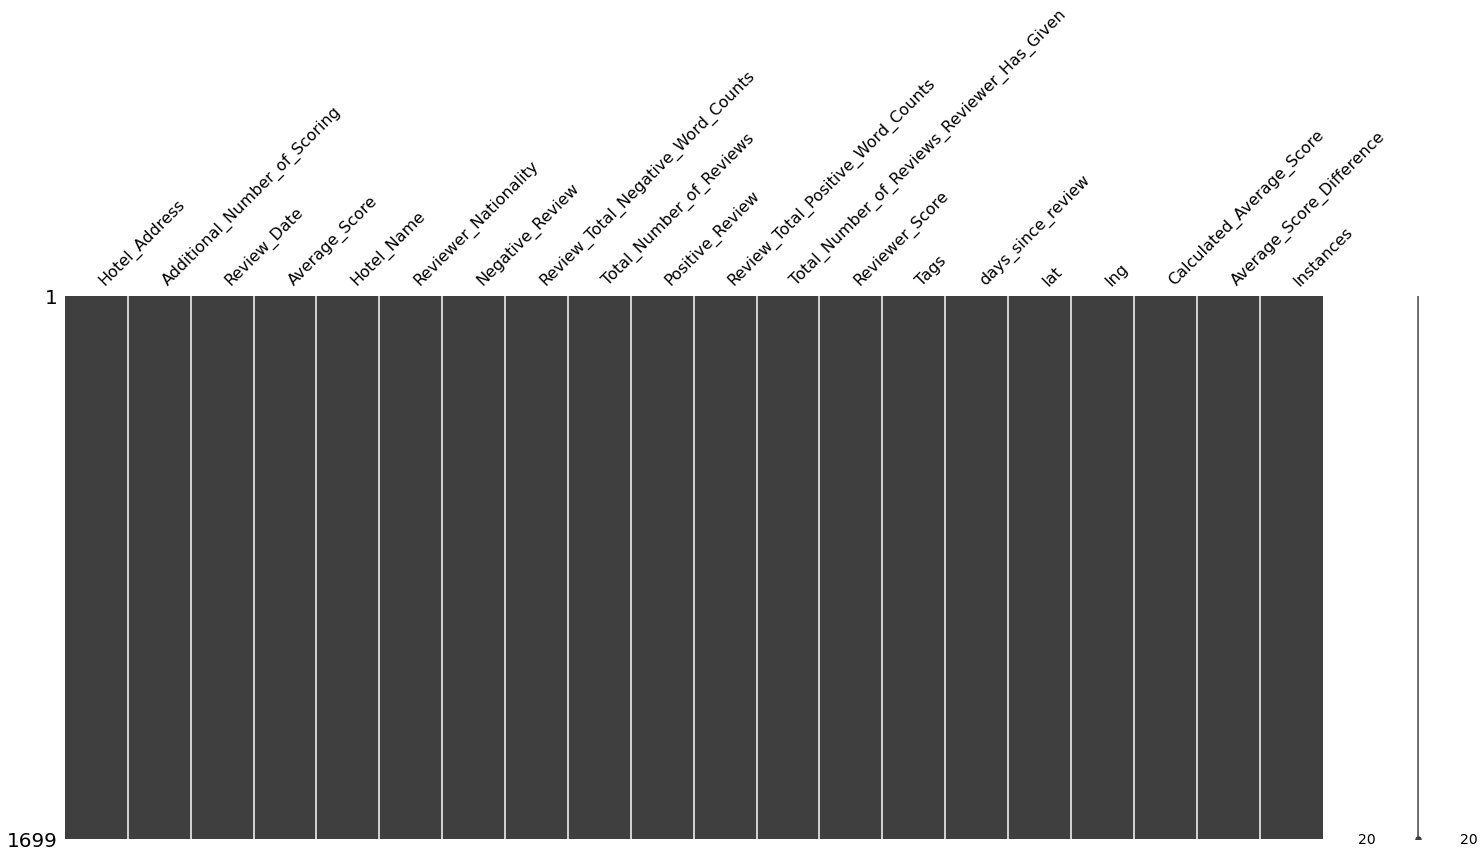

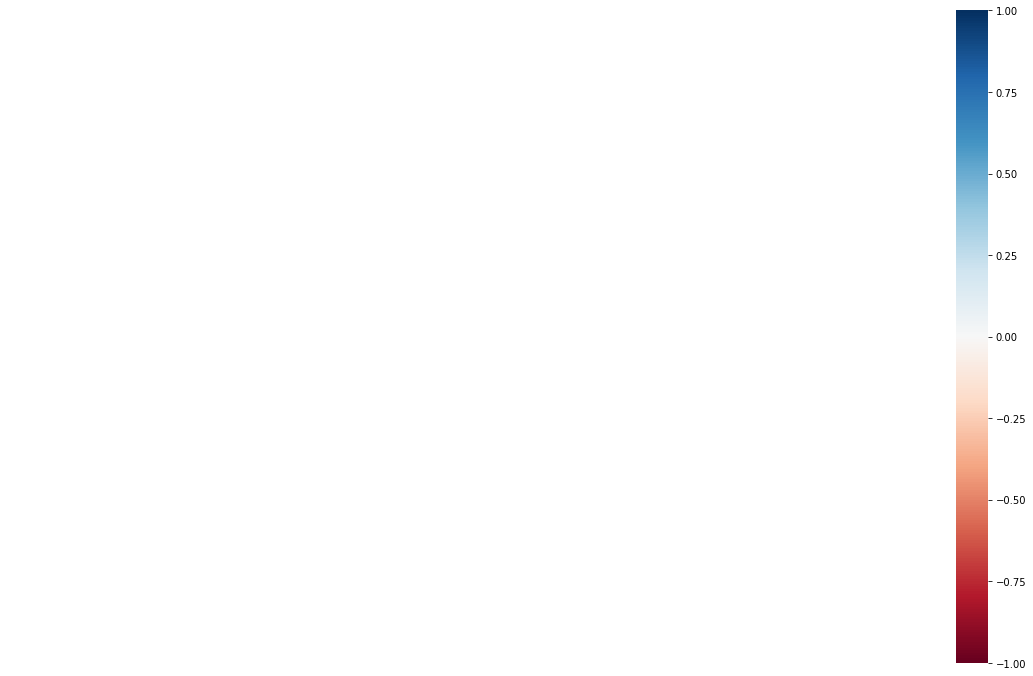

In [175]:
# Visualize missing values as a matrix.
# The white spaces denote the missing values. 
msno.matrix(df_hotel)
    
# Visualize the correlation between the number of missing values in different columns as a heatmap
# A value near -1: if one variable appears then the other variable is very likely to be missing.
# A value near 0: There is no dependence between the occurrence of missing values of two variables.
# A value near 1: if one variable appears then the other variable is very likely to be present.
msno.heatmap(df_hotel)


# Inference
# There are no null or missing values. 

## 3.2) Handle features of string type

In [176]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anjanak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [177]:
# NLP for Negative Reviews
negative_comment = []

for comment in df_hotel['Negative_Review']:
    only_letters = re.sub("[^a-zA-Z]", " ",comment)
    tokens = nltk.word_tokenize(only_letters)
    lower_case = [l.lower() for l in tokens]
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case))
    lemmas = [wordnet_lemmatizer.lemmatize(t) for t in filtered_result] 
    negative_comment.append(' '.join(lemmas))

In [178]:
# NLP for Positive Reviews
positive_comment = []

for comment in df_hotel['Positive_Review']:
    only_letters2 = re.sub("[^a-zA-Z]", " ",comment)
    tokens2 = nltk.word_tokenize(only_letters2)
    lower_case2 = [l.lower() for l in tokens2]
    filtered_result2 = list(filter(lambda l: l not in stop_words, lower_case2))
    lemmas2 = [wordnet_lemmatizer.lemmatize(t) for t in filtered_result2] 
    positive_comment.append(' '.join(lemmas2))

In [179]:
# Finding most important words in Negative Reviews
cv = CountVectorizer(analyzer = "word",stop_words = 'english',max_features = 20,ngram_range=(2,2))
most_negative_words = cv.fit_transform(negative_comment)
temp1_counts = most_negative_words.sum(axis=0)
temp1_words = cv.vocabulary_

In [180]:
# Some words are appearing a lot. Let's make new columns for these words

# room_small
room_small = np.zeros(len(df_hotel))
for i in range(len(df_hotel)):
    if ("room small" in negative_comment[i]) or ("small room" in negative_comment[i]):
        room_small[i] = 1

        
# wi-fi
wi_fi = np.zeros(len(df_hotel))
for i in range(len(df_hotel)):
    if ("wi fi" in negative_comment[i]):
        wi_fi[i] = 1


# air-conditioner
air_conditioning = np.zeros(len(df_hotel))
for i in range(len(df_hotel)):
    if ("air conditioning" in negative_comment[i]) or ("air conditioner" in negative_comment[i]) : 
        air_conditioning[i] = 1
np.sum(air_conditioning)


# booking com
booking_com = np.zeros(len(df_hotel))
for i in range(len(df_hotel)):
    if ("booking com" in negative_comment[i]): 
        booking_com[i] = 1
np.sum(booking_com)


# breakfast
breakfast = np.zeros(len(df_hotel))
for i in range(len(df_hotel)):
    if ("breakfast expensive" in negative_comment[i]) or ("breakfast included" in negative_comment[i]) or ("breakfast room" in negative_comment[i]) or ("tea coffee" in negative_comment[i]): 
        breakfast[i] = -1
np.sum(breakfast)


# room_problem
room_problem = np.zeros(len(df_hotel))
for i in range(len(df_hotel)):
    if ("mini bar" in negative_comment[i]) or ("room service" in negative_comment[i]) or ("double bed" in negative_comment[i]) or ("double room" in negative_comment[i]): 
        room_problem[i] = 1
np.sum(room_problem)

32.0

In [181]:
# Finding most important words in Positive Reviews
cv2 = CountVectorizer(analyzer = "word",stop_words = 'english',max_features = 20,ngram_range=(2,2))
most_positive_words = cv2.fit_transform(positive_comment)
temp2_counts = most_positive_words.sum(axis=0)
temp2_words = cv2.vocabulary_

In [182]:
# location
location = np.zeros(len(df_hotel))
for i in range(len(df_hotel)):
    if ("good location" in positive_comment[i]) or ("great location" in positive_comment[i]) or ("location excellent" in positive_comment[i]) or ("location great" in positive_comment[i]) or ("location good" in positive_comment[i]) or ("walking distance" in positive_comment[i]) or ("excellent location" in positive_comment[i]): 
        location[i] = 1
np.sum(location)


# staff
staff = np.zeros(len(df_hotel))
for i in range(len(df_hotel)):
    if ("friendly helpful" in positive_comment[i]) or ("friendly staff" in positive_comment[i]) or ("helpful staff" in positive_comment[i]) or ("staff helpful" in positive_comment[i]) or ("staff friendly" in positive_comment[i]): 
        staff[i] = 1
np.sum(staff)


# bed and room
bed_and_room = np.zeros(len(df_hotel))
for i in range(len(df_hotel)):
    if ("bed comfortable" in positive_comment[i]) or ("clean room" in positive_comment[i]) or ("comfortable bed" in positive_comment[i]) or ("comfortable room" in positive_comment[i]) or ("comfy bed" in positive_comment[i]) or ("room clean" in positive_comment[i]) :
        bed_and_room[i] = 1
np.sum(bed_and_room)


# breakfast
for i in range(len(df_hotel)):
    if ("breakfast good" in positive_comment[i]) or ("good breakfast" in positive_comment[i]): 
        breakfast[i] = breakfast[i]+ 1
np.sum(breakfast)


7.0

In [183]:
# Day_Passed
df_hotel['Day_Passed'] = df_hotel['days_since_review'].map(lambda x: re.findall(r'\d+',x))
df_hotel['Day_Passed'] = df_hotel['Day_Passed'].map(lambda x: x[0])
del df_hotel['days_since_review']
df_hotel['Day_Passed'] = df_hotel['Day_Passed'].astype(int)

In [184]:
# Mining some important information from tags
df_hotel['Leisure'] = df_hotel['Tags'].map(lambda x: 1 if ' Leisure trip ' in x else 0)
df_hotel['Business'] = df_hotel['Tags'].map(lambda x: 2 if ' Business trip ' in x else 0)
df_hotel['Trip_type'] = df_hotel['Leisure'] + df_hotel['Business']
df_hotel['Trip_type'] = df_hotel[df_hotel['Trip_type'] == 0]['Trip_type'].map(lambda x: 1 if random.random() > 0.2 else 2)
df_hotel['Trip_type'] = df_hotel['Trip_type'].fillna(0)
df_hotel['Trip_type'] = df_hotel['Trip_type'] + df_hotel['Business'] + df_hotel['Leisure']
del df_hotel['Leisure'] , df_hotel['Business']

In [185]:
df_hotel['Trip_type'].value_counts()

1.0    1446
2.0     253
Name: Trip_type, dtype: int64

In [186]:
# Couple or Solo or Group or Family_with_older children or Family with younger Children
df_hotel['Solo'] = df_hotel['Tags'].map(lambda x: 1 if ' Solo traveler ' in x else 0)
df_hotel['Couple'] = df_hotel['Tags'].map(lambda x: 2 if ' Couple ' in x else 0)
df_hotel['Group'] = df_hotel['Tags'].map(lambda x: 3 if ' Group ' in x else 0)
df_hotel['Family_with_young_children'] = df_hotel['Tags'].map(lambda x: 4 if ' Family with young children ' in x else 0)
df_hotel['Family_with_older_children'] = df_hotel['Tags'].map(lambda x: 5 if ' Family with older children ' in x else 0)
df_hotel['whom'] = df_hotel['Solo'] + df_hotel['Couple'] + df_hotel['Group'] + df_hotel['Family_with_young_children'] + df_hotel['Family_with_older_children']
del df_hotel['Solo'], df_hotel['Couple'], df_hotel['Group'], df_hotel['Family_with_young_children'], df_hotel['Family_with_older_children']

In [187]:
df_hotel.whom.value_counts()

2    986
1    287
3    205
4    124
5     90
0      7
Name: whom, dtype: int64

In [188]:
# Assign 2 to 0's because it is the most
df_hotel['whom'] = df_hotel['whom'].map(lambda x: 2 if x == 0 else x)
df_hotel.whom.value_counts()

2    993
1    287
3    205
4    124
5     90
Name: whom, dtype: int64

In [189]:
# Stayings
df_hotel['Stayed_1_days'] = df_hotel['Tags'].map(lambda x: 1 if ' Stayed 1 night ' in x else 0)
df_hotel['Stayed_2_days'] = df_hotel['Tags'].map(lambda x: 2 if ' Stayed 2 nights ' in x else 0)
df_hotel['Stayed_3_days'] = df_hotel['Tags'].map(lambda x: 3 if ' Stayed 3 nights ' in x else 0)
df_hotel['Stayed_4_days'] = df_hotel['Tags'].map(lambda x: 4 if ' Stayed 4 nights ' in x else 0)
df_hotel['Stayed_5_days'] = df_hotel['Tags'].map(lambda x: 5 if ' Stayed 5 nights ' in x else 0)
df_hotel['Stayed_6_days'] = df_hotel['Tags'].map(lambda x: 6 if ' Stayed 6 nights ' in x else 0)
df_hotel['Stayed_7_days'] = df_hotel['Tags'].map(lambda x: 7 if ' Stayed 7 nights ' in x else 0)
df_hotel['Stayed_8_days'] = df_hotel['Tags'].map(lambda x: 8 if ' Stayed 8 nights ' in x else 0)
df_hotel['Stayed_9_days'] = df_hotel['Tags'].map(lambda x: 9 if ' Stayed 9 nights ' in x else 0)
df_hotel['Stayed_10_days'] = df_hotel['Tags'].map(lambda x: 10 if ' Stayed 10 nights ' in x else 0)
df_hotel['Stayed_11_days'] = df_hotel['Tags'].map(lambda x: 11 if ' Stayed 11 nights ' in x else 0)
df_hotel['Stayed_12_days'] = df_hotel['Tags'].map(lambda x: 12 if ' Stayed 12 nights ' in x else 0)
df_hotel['Stayed_13_days'] = df_hotel['Tags'].map(lambda x: 13 if ' Stayed 13 nights ' in x else 0)
df_hotel['Stayed_14_days'] = df_hotel['Tags'].map(lambda x: 14 if ' Stayed 14 nights ' in x else 0)
df_hotel['Stayed_15_days'] = df_hotel['Tags'].map(lambda x: 15 if ' Stayed 15 nights ' in x else 0)
df_hotel['Stayed_16_days'] = df_hotel['Tags'].map(lambda x: 16 if ' Stayed 16 nights ' in x else 0)
df_hotel['Stayed_17_days'] = df_hotel['Tags'].map(lambda x: 17 if ' Stayed 17 nights ' in x else 0)
df_hotel['Stayed_18_days'] = df_hotel['Tags'].map(lambda x: 18 if ' Stayed 18 nights ' in x else 0)
df_hotel['Stayed_19_days'] = df_hotel['Tags'].map(lambda x: 19 if ' Stayed 19 nights ' in x else 0)
df_hotel['Stayed_20_days'] = df_hotel['Tags'].map(lambda x: 20 if ' Stayed 20 nights ' in x else 0)

In [190]:
temp_list = []
for j in range(20,40):
    sum = np.sum(df_hotel.iloc[:,j])/(j-19)
    temp_list.append(sum)
    
staying = np.array(temp_list,dtype=int)
np.sum(staying)

4728

In [191]:
df_hotel['stayed_days'] = df_hotel['Stayed_1_days'] + df_hotel['Stayed_2_days'] + df_hotel['Stayed_3_days'] + df_hotel['Stayed_4_days'] + df_hotel['Stayed_5_days'] + df_hotel['Stayed_6_days'] + df_hotel['Stayed_7_days'] + df_hotel['Stayed_8_days'] + df_hotel['Stayed_9_days'] + df_hotel['Stayed_10_days'] + df_hotel['Stayed_11_days'] + df_hotel['Stayed_12_days'] + df_hotel['Stayed_13_days'] + df_hotel['Stayed_14_days'] + df_hotel['Stayed_15_days'] + df_hotel['Stayed_16_days'] + df_hotel['Stayed_17_days'] + df_hotel['Stayed_18_days'] + df_hotel['Stayed_19_days'] + df_hotel['Stayed_20_days']
del df_hotel['Stayed_1_days'] , df_hotel['Stayed_2_days'] , df_hotel['Stayed_3_days'] , df_hotel['Stayed_4_days'], df_hotel['Stayed_5_days'] , df_hotel['Stayed_6_days'] , df_hotel['Stayed_7_days'] , df_hotel['Stayed_8_days'] , df_hotel['Stayed_9_days'] , df_hotel['Stayed_10_days'] , df_hotel['Stayed_11_days'] , df_hotel['Stayed_12_days'] , df_hotel['Stayed_13_days'] , df_hotel['Stayed_14_days'] , df_hotel['Stayed_15_days'] , df_hotel['Stayed_16_days'] , df_hotel['Stayed_17_days'] , df_hotel['Stayed_18_days'] , df_hotel['Stayed_19_days'] , df_hotel['Stayed_20_days']

In [192]:
df_hotel.shape

(1699, 23)

In [193]:
df_hotel.stayed_days.value_counts()

# Assgining stayings which are over 20 days as 21
df_hotel['stayed_days'] = df_hotel['stayed_days'].map(lambda x: 21 if x == 0 else x)

In [194]:
len(df_hotel[df_hotel['stayed_days'] == 0])

0

In [195]:
# Adding the extracted columns
df_hotel['room_small'] = room_small
df_hotel['wi_fi'] = wi_fi
df_hotel['air_conditioning'] = air_conditioning
df_hotel['breakfast'] = breakfast
df_hotel['booking_com'] = booking_com
df_hotel['room_problem'] = room_problem
df_hotel['location'] = location
df_hotel['staff'] = staff
df_hotel['bed_and_room'] = bed_and_room

In [196]:
df_hotel

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,...,stayed_days,room_small,wi_fi,air_conditioning,breakfast,booking_com,room_problem,location,staff,bed_and_room
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,42950,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,...,6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,42950,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,...,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,42947,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,...,3,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,42947,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,...,3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,42940,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694,1 2 Serjeant s Inn Fleet Street City of London...,639,42493,9.2,Apex Temple Court Hotel,Netherlands,No Negative,0,2619,Location rooms and staff,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1695,1 2 Serjeant s Inn Fleet Street City of London...,639,42493,9.2,Apex Temple Court Hotel,United Kingdom,Nothing,2,2619,Excellent location for seeing a show,...,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1696,1 2 Serjeant s Inn Fleet Street City of London...,639,42492,9.2,Apex Temple Court Hotel,United States of America,No Negative,0,2619,Location easy to get downtown and to local pu...,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1697,1 2 Serjeant s Inn Fleet Street City of London...,639,42491,9.2,Apex Temple Court Hotel,United Kingdom,My room overlooked the office next door so my...,21,2619,The bar staff were very good,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [197]:
# Hotel Country
country = df_hotel['Hotel_Address'].map(lambda x: x.split()[-1])
country = country.map(lambda x: 'United Kingdom' if x == 'Kingdom' else x)
df_hotel['hotel_country'] = country

In [198]:
# For trip_type column, assigned 0&1 instead of 1&2
df_hotel['Trip_type'] = df_hotel['Trip_type'].map(lambda x: 0 if x == 2 else x)
df_hotel = df_hotel.rename(columns = {'Trip_type':'Leisure_or_not'})

# Removing unimportant columns
df_hotel = df_hotel.drop(['Review_Date', 'Instances', 'Hotel_Address','Additional_Number_of_Scoring','Hotel_Name','Reviewer_Nationality','Negative_Review','Total_Number_of_Reviews','Positive_Review','Total_Number_of_Reviews_Reviewer_Has_Given','lat','lng','Tags','Day_Passed','whom','breakfast','location','bed_and_room','hotel_country', 'Calculated_Average_Score', 'Average_Score_Difference'],axis=1)

In [199]:
df_hotel['Reviewer_Score'].unique()

array([ 2.9,  7.5,  7.1,  3.8,  6.7,  4.6, 10. ,  6.5,  7.9,  5.8,  9.2,
        8.8,  6.3,  5.4,  9.6,  8.3,  4.2,  3.3,  5. ,  2.5,  3.1,  6. ,
        5.5,  9.5,  8. ,  8.5])

In [200]:
df_hotel = df_hotel.applymap(int)

In [201]:
df_hotel['Reviewer_Score'].unique()

array([ 2,  7,  3,  6,  4, 10,  5,  9,  8], dtype=int64)

## 3.3) Outlier Detection & Removal

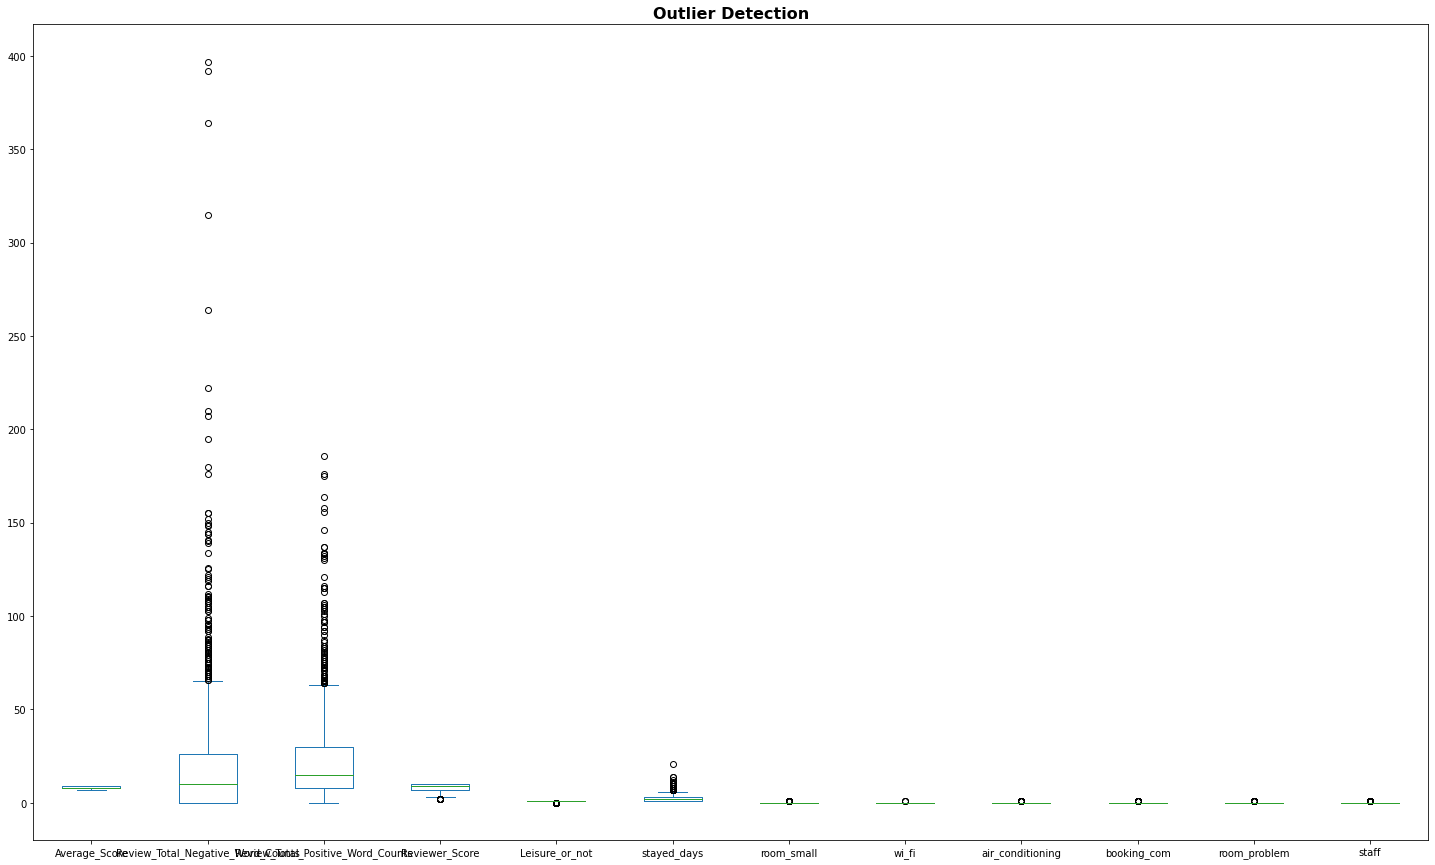

In [202]:
# Detecting Outliers using Box Plot
boxplot = df_hotel[df_hotel.columns.difference(['Review_Date'], sort=False)].plot(kind='box', figsize=(25, 15))
boxplot.set_title('Outlier Detection', fontdict={'fontsize':16, 'fontweight': 'bold'})

# Show plot
plt.show()

In [203]:
# Remove Outliers
print("Dataset shape with outliers: ", df_hotel.shape)
z = np.abs(stats.zscore(df_hotel))
df_hotel = df_hotel[(z < 3).all(axis=1)]
print("Dataset shape without outliers: ", df_hotel.shape)

Dataset shape with outliers:  (1699, 12)
Dataset shape without outliers:  (1473, 12)


## 3.4) Standardization

In [204]:
# Standardization
standard_scaler = preprocessing.StandardScaler()
standardised_values = standard_scaler.fit_transform(df_hotel.loc[:, df_hotel.columns != 'Reviewer_Score'])
scaled_df = pd.DataFrame(standardised_values)
scaled_df

# Inference
# Standardization is chosen because the data doesn't follow a normal distribution and is skewed

,0,1,2,3,4,5,6,7,8,9,10
0,-1.552302,1.338572,0.032148,0.412282,0.476788,0.0,0.0,0.0,0.0,0.0,-0.486596
1,-1.552302,0.087197,-0.025884,0.412282,-1.004876,0.0,0.0,0.0,0.0,0.0,-0.486596
2,-1.552302,0.888077,-0.141949,0.412282,1.958452,0.0,0.0,0.0,0.0,0.0,-0.486596
3,-1.552302,-0.213133,-0.083917,0.412282,-0.264044,0.0,0.0,0.0,0.0,0.0,2.055092
4,-1.552302,0.938132,-1.186533,0.412282,-1.004876,0.0,0.0,0.0,0.0,0.0,-0.486596
...,...,...,...,...,...,...,...,...,...,...,...
1468,0.965915,-0.763738,-0.896371,0.412282,-0.264044,0.0,0.0,0.0,0.0,0.0,-0.486596
1469,0.965915,-0.663628,-0.780306,0.412282,-1.004876,0.0,0.0,0.0,0.0,0.0,-0.486596
1470,0.965915,-0.763738,-0.025884,0.412282,-0.264044,0.0,0.0,0.0,0.0,0.0,-0.486596
1471,0.965915,0.287417,-0.722274,0.412282,-0.264044,0.0,0.0,0.0,0.0,0.0,-0.486596


# 8) Compare the performance of the two classifiers – Logistic regression and Decision tree to predict

## 8.1) Decision Tree

In [205]:
# Separate features and target variable
y = df_hotel['Reviewer_Score']
X = scaled_df

In [206]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)


# Create the Decision Tree model for regression
dt_model = DecisionTreeClassifier()

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)
y_pred

array([ 6, 10,  9,  9,  6,  9,  9,  9,  9, 10, 10,  9,  7,  9,  7, 10, 10,
        9, 10, 10, 10,  8, 10,  7,  8,  9,  6, 10,  7,  7,  9,  7, 10,  9,
        9,  7,  9, 10,  8,  5,  8,  8, 10,  9,  9, 10,  7,  7,  8, 10,  6,
        9,  4,  4,  9,  9, 10, 10, 10,  9,  9,  7, 10,  8,  5, 10,  9, 10,
       10,  9,  9,  6, 10, 10,  7, 10, 10,  9, 10, 10, 10,  9,  9,  9,  5,
        9, 10,  9, 10,  8,  7,  5,  9,  7,  7, 10,  4,  8,  5, 10, 10, 10,
        9, 10,  9, 10,  7,  7,  5,  6, 10,  9, 10, 10,  7, 10, 10,  4,  9,
        8,  7, 10, 10,  6,  9,  7,  6,  7,  6,  5,  9, 10,  7,  9,  8,  9,
       10,  7,  7,  6,  9, 10, 10,  9,  7,  9,  5,  9,  9,  7,  7, 10,  9,
        9, 10, 10,  9,  7, 10,  5,  8,  5,  9,  9,  9,  8, 10,  6, 10, 10,
        7,  9,  8,  9,  6, 10, 10,  7, 10,  9,  9, 10,  7, 10,  5, 10,  8,
        8,  9,  7,  6, 10, 10, 10, 10,  9,  7, 10,  8, 10,  8,  9,  9,  5,
        6, 10, 10,  8,  6, 10, 10, 10,  5,  8, 10,  9,  8,  9,  9,  8,  8,
        7,  8, 10,  9,  5

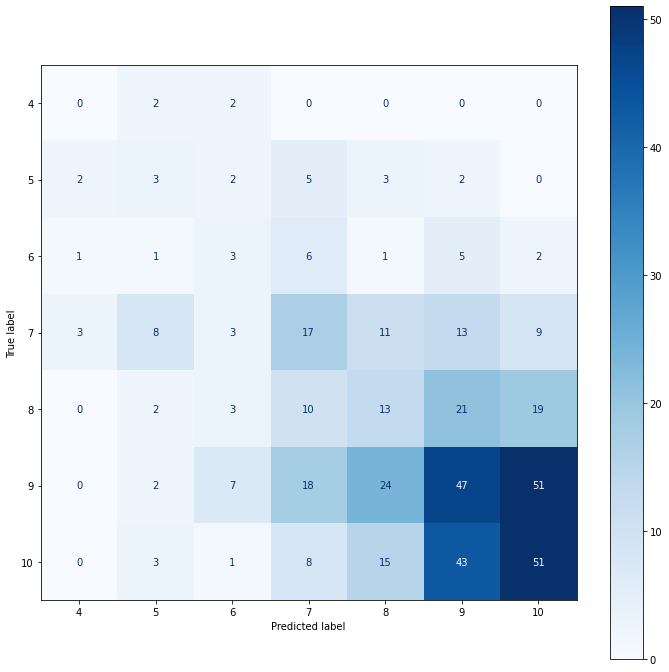

In [207]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=dt_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_model.classes_)
fig, ax = plt.subplots(figsize=(12,12))
disp.plot(cmap=plt.cm.Blues, values_format='g', ax=ax)

In [208]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         4
           5       0.14      0.18      0.16        17
           6       0.14      0.16      0.15        19
           7       0.27      0.27      0.27        64
           8       0.19      0.19      0.19        68
           9       0.36      0.32      0.34       149
          10       0.39      0.42      0.40       121

    accuracy                           0.30       442
   macro avg       0.21      0.22      0.21       442
weighted avg       0.31      0.30      0.30       442



## 8.2) Logistic Regression

In [209]:
# Separate features and target variable
# X = df_hotel[columns]
# y = df_hotel[['Reviewer_Score']]

# Split the dataset into train and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.3, shuffle=True)

# Create the Logistic Regression model for classification
lr_model = LogisticRegression()

# Train the model
lr_model.fit(X1_train, y1_train)

# Make predictions on the test set
y1_pred = lr_model.predict(X1_test)
y1_pred

array([10,  9,  9,  7,  9, 10,  7,  9,  9,  9, 10,  9, 10,  9,  7, 10, 10,
        9,  7,  7, 10,  7, 10,  7, 10,  9, 10, 10,  7, 10, 10,  7, 10, 10,
        9,  9,  9,  9, 10,  7, 10,  9, 10,  7,  9,  9, 10, 10,  7,  7,  9,
       10,  9, 10,  9,  9, 10, 10, 10,  9, 10, 10,  9, 10,  7,  8,  7,  9,
        9, 10,  9, 10, 10, 10,  9, 10,  9,  8,  9, 10,  9,  7,  9, 10,  9,
        7,  9,  9,  9, 10, 10, 10,  9,  7,  7, 10,  9,  7, 10,  9,  9, 10,
        9,  9,  9,  9,  9, 10, 10,  9,  7,  9,  9, 10,  7,  7,  9,  9, 10,
       10,  9,  7,  7,  7, 10,  7, 10,  9,  9,  9,  7,  9, 10,  9,  9, 10,
        9,  9,  9, 10, 10,  9,  9, 10,  9,  9,  9,  9,  7,  9,  9,  9,  9,
        8,  7,  9,  9,  9,  7,  7, 10,  9,  7,  9, 10,  9, 10,  7,  9,  9,
        7,  9,  9,  7,  7, 10, 10,  8, 10, 10,  9,  9,  9, 10, 10,  9, 10,
       10,  7, 10,  9, 10,  7, 10,  9, 10,  9,  9,  9,  7,  9,  9,  7,  7,
        8,  8,  9, 10, 10, 10,  9,  6,  9,  7,  9, 10, 10, 10,  9,  7,  9,
       10,  9,  9, 10,  7

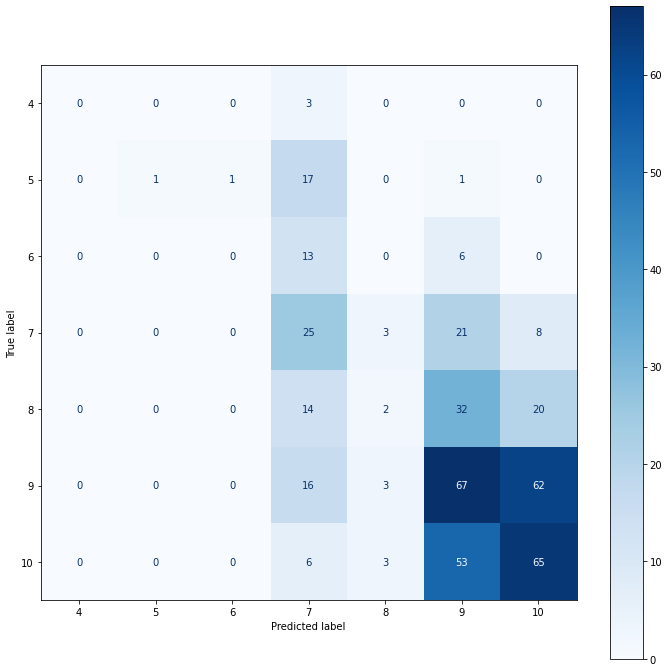

In [210]:
# Confusion Matrix
cm = confusion_matrix(y1_test, y1_pred, labels=lr_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
fig, ax = plt.subplots(figsize=(12,12))
disp.plot(cmap=plt.cm.Blues, values_format='g', ax=ax)

In [211]:
# Classification Report
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         3
           5       1.00      0.05      0.10        20
           6       0.00      0.00      0.00        19
           7       0.27      0.44      0.33        57
           8       0.18      0.03      0.05        68
           9       0.37      0.45      0.41       148
          10       0.42      0.51      0.46       127

    accuracy                           0.36       442
   macro avg       0.32      0.21      0.19       442
weighted avg       0.35      0.36      0.32       442



## 8.3) Compare Models

Logistic Regression: 0.395123 (0.026552)
Decision Tree: 0.313670 (0.034146)


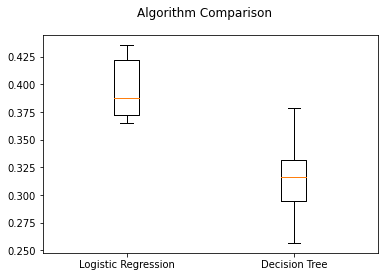

In [212]:
# Compare models
from sklearn import model_selection
classifiers = []
classifiers.append(('Logistic Regression', LogisticRegression()))
classifiers.append(('Decision Tree', DecisionTreeClassifier()))

# Evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in classifiers:
    kfold = model_selection.KFold(n_splits=10, shuffle=True,random_state=7)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# Boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


# Inference
# Plot shows spread of the accuracy scores across each cross validation fold for each algorithm

In [213]:
# Logging for Visual Comparison
y_compare = df_hotel['Reviewer_Score']
X_compare = scaled_df

# Split the dataset into train and test sets
X_compare_train, X_compare_test, y_compare_train, y_compare_test = train_test_split(X_compare, y_compare, test_size=0.3)

log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)
classifiers = [x[1] for x in classifiers]
for clf in classifiers:
    print(clf)
    clf.fit(X_compare_train, y_compare_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_compare_test)
    acc = accuracy_score(y_compare_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_compare_test)
    ll = log_loss(y_compare_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

LogisticRegression()
LogisticRegression
****Results****
Accuracy: 39.3665%
Log Loss: 1.370400968236842
DecisionTreeClassifier()
DecisionTreeClassifier
****Results****
Accuracy: 31.4480%
Log Loss: 23.156433330152552


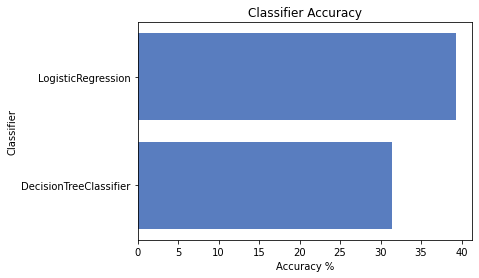

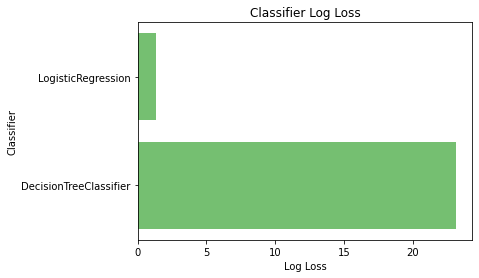

In [214]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()